<br><br><font color="gray">DOING COMPUTATIONAL SOCIAL SCIENCE<br>MODULE 9 AND 10<strong> PROBLEM SETS</strong></font>

# <font color="#49699E" size=40>Probability, Generative Models, and Bayesian Inference</font>
This module notebook assignment is organized into two parts. 

- **[PART A](#SECAEP) (Accompanying Chapter 28, "Probability: A Primer")**
    - [Exercises and Practice Problems](#SECAEP) (All students)
- **[PART B](#SECBEP) (Accompanying Chapter 30, "Bayesian Regression"**)
    - [Exercises and Practice Problems](#SECBEP) (All students)
- **[PART C](#SECCEP) (Accompanying Chapter 31, "Hierarchical Bayesian Regression"**)
    - [Exercises and Practice Problems](#SECcEP) (All students)

# What You Need to Know Before Getting Started

- **You can consult any resources you want when completing these exercises and problems**. Just as it is in the "real world:" if you can't figure out how to do something, look it up. My recommendation is that you check the relevant parts of the assigned reading or search for inspiration on [https://stackoverflow.com](https://stackoverflow.com).
- **Each problem is worth 1 point**. All problems are equally weighted.
- **The information you need for each problem set is provided in the blue and green cells.** General instructions / the problem set preamble are in the blue cells, and instructions for specific problems are in the green cells. **You have to execute all of the code in the problem set, but you are only responsible for entering code into the code cells that immediately follow a green cell**. You will also recognize those cells because they will be incomplete. You need to replace each `____` with the code that will make the cell execute properly.
- **The comments in the problem cells contain clues indicating what the following line of code is supposed to do.** Use these comments as a guide when filling in the blanks. 
- **Each problem cell stores one object named according to the problem (e.g. _09)**. These are not important for you, but we use them to help grade your work efficiently, so **do not delete them or change their names**. If you do, you will lose marks.
- **You can ask for help**. If you run into problems, you can reach out to John (john.mclevey@uwaterloo.ca) or Pierson (pbrowne@uwaterloo.ca) for help. You can ask a friend for help if you like, regardless of whether they are enrolled in the course.

Finally, remember that you do not need to "master" this content before moving on to other course materials, as what is introduced here is reinforced throughout the rest of the course. You will have plenty of time to practice and cement your new knowledge and skills.

# How to Submit Your (Pickled) Assignment! 

Since we've had to rethink the way we deliver, collect, and evaluate these problem sets, we want to be very clear about what you need to do to properly submit this module notebook assignment. Please read the following explanation of our process so that you understand how this works, and what you need to do.

At the very end of this notebook, there is a code cell that will compile all of your answers to every problem in the assignment and save them as a 'pickle' file (`.pkl`) in the current working directory. You can execute that cell as many times as you like. Each time you run it, it will overwrite the old pickle with your updated answers. **Once you've ensured that everything in the notebook is complete and finished to your satisfaction, it's up to you to get the pickle that you just created and upload it to the appropriate Learn dropbox for this module.** The file you are looking for will not exist until you run the cells at the end of the notebook. Once it has been created, it will follow this naming convention: 

> `module_[number]__student_[your_student_number].pkl`

To be very clear, **you need to submit the pickle to Learn**. You do not need to upload the Jupyter Notebook as initially planned. **Just the pickle!**

## Make Sure Everything is Good to Go

It's generally a good idea to do a 'fresh' run of your entire notebook before you submit your assignment to make sure that everything is working as it should be. You can use the button with the 'Fast-Forward' arrows in the Jupyter toolbar above to restart the kernel (resetting everything to initial conditions) and running every code cell in the notebook, in order. You can also select 'Restart and Run All' from the Kernel dropdown menu. If the entire notebook runs without throwing any errors, you should be good to go!

If you're running into issues, make sure that you haven't changed any of the 'answer' variable names we provided you with (e.g., we asked you to store your answer to the first question in a variable called `_01`). If you change an answer's variable name or don't store your answer in that variable, the project won't finalize properly and you won't get proper credit for your work. The same goes for the `student_id` metadata variable we ask you to complete immediately below; if any of those are missing, haven't been filled in properly, or have been renamed, issues may arise during the grading process and you will not receive proper credit. So make sure you enter your student information, and don't delete or change the names of the variables that store your answers to each problem!

## IMPORTANT: ADD YOUR STUDENT ID NUMBER

<div class="alert alert-block alert-danger">
To evaluate your work, we need you to provide your student number. In the cell below, <strong>replace '12345678' with your student number</strong>. The student_id' variable needs to be an integer, so <strong>do not wrap it in quotes.</strong>
</div>

In [1]:
# Your UWaterloo student ID number
student_id = 20611274 

## Package Imports

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymc3 as pm
import arviz as az

import warnings
warnings.filterwarnings("ignore")

def plot_ppd(pos_pred, outcome_var):

    mu_hpd = az.hdi(pos_pred['μ'], 0.89)
    D_sim = pos_pred['y'].mean(axis=0)

    fig, ax = plt.subplots(figsize=(9, 9))

    plt.errorbar(
        outcome_var,
        pos_pred['y'].mean(0),
        yerr=np.abs(pos_pred["y"].mean(0) - mu_hpd.T),
        fmt="C0o"
    )

    ax = sns.scatterplot(outcome_var, D_sim, s=1, color="darkgrey")

    min_x, max_x = outcome_var.min(), outcome_var.max()

    ax.plot([min_x, max_x], [min_x, max_x], "k--")
    ax.set_ylabel("Predicted Log(Insurance Charge)")
    ax.set_xlabel("Observed Log(Insurance Charge)")


# <font color="#49699E">PART A | CHAPTER 28</font>
<a id="SECAEP"></a>

## Question 1:
<div class="alert alert-block alert-success">
Answer the following four questions by filling in the blanks. Your answers should take the form of integers, floats (which can be expressed in fractional format), or strings. The course readings cover all of the distributions needed to answer the questions. <br>
<ol>
    <li> Imagine you have a busted-up old truck that doesn't start on its own; you have to hit the engine block with a sledgehammer while the starter motor is engaged to even have a chance of getting it to turn over. From your experience with the truck, this leads to one of five different outcomes: the truck emits a loud bang and a plume of smoke, the truck misfires, the truck briefly comes to life before sputtering out, the truck starts normally, or nothing happens. As far as you can tell, the frequency of each outcome is identical. Let $X$ be a random variable that is mapped onto each of the possible outcomes. What is the distribution of $X$?      
        <br><br>
    <li> Let's say you attempt to start the car with a single swing of the sledgehammer. What is the probability that $X$ = "Loud Bang, Plume of Smoke"?
        <br><br>
    <li> As you (and your long-suffering neighbours) are now keenly aware, any one swing of the sledgehammer is unlikely to start the car properly. For any given swing of the sledgehammer, what is the probability that the truck <b>won't</b> fully start (and stay running)?  
        <br><br>
    <li> Imagine that you're trying to start the truck, but it's being particularly recalcitrant today. It takes you 10 swings of the sledgehammer to get it to start 'properly'. What distribution would you use to describe the probability of observing 4 misfires during the startup procedure?  
</ol>
</div>

In [ ]:
#_01

# 1. Distribution of X
_01_1 = "Discrete uniform distribution" 

# 2. Probability of X = 'Loud Bang, Plume of Smoke'
_01_2 = 1/5

# 3. Probability that truck does not start properly and stay running
_01_3 = 1/5

# 4. Distribution you would use to determine probability of observing 4 misfires in 10 attempts
_01_4 = "Binomial distribution"

# Store the result in the assignment variable
_01 = (_01_1.lower(), _01_2, _01_3, _01_4.lower()) # do not change

## Question 2:
<div class="alert alert-block alert-success">
Answer the following four questions by filling in the blanks. Your answers should take the form of integers, floats (which can be expressed in fractional format), or strings. The course readings cover all of the distributions needed to answer the questions. <br>
<ol>
    <li> You have a gregarious cat named Solomon for whom the undisupted highlight of each day is wet food feeding time. You give him his wet food every evening at 9:00pm sharp, and you always feed him in the kitchen. Solomon has a well-tuned internal clock, and can usually be found waiting in the kitchen (very impatiently) up to 10 minutes before scheduled mealtimes. Sometimes, however, Solomon will be elsewhere in the house -- blissfully asleep -- when 9:00pm rolls around. The moment he hears you pick up a tin of cat food, he'll immediately start scrambling towards the kitchen at breakneck speed. Amused by his behaviour, you have decided to describe the amount of time it takes for Solomon to appear in the kitchen after 9:00pm using a random variable $\text{TUS}$ (which stands for "Time Until Solomon"). You measure this time by starting a stopwatch the moment you pick up a can of wet cat food (precisely at 9:00pm), and stop the stopwatch as soon as Solomon enters the kitchen. On most days, $\text{TUS} =$ 0, because Solomon is already in the kitchen, but on other days, the amount of time it takes him depends on where in the house he's sleeping and how sleepy he is. He's more likely to sleep in rooms close to the kitchen than he is in rooms further away. What is the distribution of $\text{TUS}$?
        <br><br>
    <li> Approximately how much probability should the distribution of $\text{TUS}$ place on negative-valued events? (Your answer should be numerical)
        <br><br>
    <li> Solomon is an indoor cat, but he's obsessed with the great outdoors. One of his favourite daytime activities is to sit at the screen door and yowl loudly for minutes on end, hoping to convince you to let him out (it hasn't worked yet, and you're pretty sure it never will). Amused by your use of probability distributions to describe your cat's idiosyncratic behaviour (and lacking anything better to do during COVID lockdown), you decide to describe the amount of time Solomon spends yowling at the door using a random variable $\text{YD}$ (which stands for "Yowls Duration"). On days when Solomon decides to have a yowling session, you'd say that -- on average -- he spends about 20 minutes making a ruckus, but that number is about equally likely to be higher or lower on any given day. How is $\text{YD}$ distributed?
        <br><br>
    <li> What is the name of the parameter you would use to describe the average (mean) value of $\text{YD}$? 
</ol>
</div>

In [ ]:
#_02

# 1. Distribution of TUS
_02_1 = "Stationary distribution" 

# 2. Approximate amount of probability TUS places on negative-valued events
_02_2 = 1/4

# 3. Distribution of YD
_02_3 = "Normal distribution"

# 4. Name of parameter describing mean value of YD
_02_4 = "Mu"


# Store the result in the assignment variable
_02 =  (_02_1.lower(), _02_2, _02_3.lower(), _02_4.lower())  #do not change 

## Question 3:
<div class="alert alert-block alert-success">
Despite your vigilance, Solomon occasionally manages to slip out the screen door and into your backyard. You almost always manage to re-capture him and bring him inside, but one time, you didn't need to: Solomon escaped during the winter and, after landing with all four of his paws in the snow, decided that he wasn't a fan and sauntered back indoors of his own accord. As a result of his unpleasant experience, you've noticed that Solomon is less likely to have a yowl session on days where the weather looks cold or inclement.  
<br><br>
    It's morning. You're still in bed, but you can hear that Solomon is yowling away downstairs. The overnight forecast predicted good weather, with only a 30% chance of there being snow on the ground this morning. You want to get out for a walk today, but in order to know how to dress, you want to know if it snowed or not! You could, of course, just get up and look out the window, but your bed is warm and you don't want to leave just yet. Instead, you decide to run some quick calculations in your head to see if Solomon's yowling will help you make a decision. 
<br><br>   
Here's what you know:
<ul>
    <li> The overnight weather forecast called for a 30% chance of snow (if it snowed, you would <b>not</b> consider today to be a 'good weather' day. If there was no snow last night, you would consider it to be a 'good weather' day). 
    <li> Solomon is yowling right now.
    <li> Solomon is more likely to yowl on 'good weather' days: he yowls on  80% of the days when the weather is good.
    <li> If we assume the weather forecast was an accurate description of the probability of snow, then Solmon had a 66% chance of yowling today (regardless of the weather).
</ul>
<br>
You have all of the information you need to use Bayes theorem to solve for 'the probability of good weather, given that Solomon is yowling.' For each of the prompts below, supply the numerical value (in decimal format, not percentages) for that component of the Bayes theorem formula.
</div>

In [4]:
#_03

# Provide the numerical value of the Likelihood
_03_likelihood = 0.66

# Provide the numerical value of the 'Prior'
_03_prior = 0.70

# Provide the numerical value of the Total Probability
_03_total_probability = 0.46

# Store the result in the assignment variable
_03 = (_03_likelihood, _03_prior, _03_total_probability) # do not change

## Question 4:
<div class="alert alert-block alert-success">
Calculate the probability of today being a good weather day, given that Solomon is yowling. (Your answer will automatically be rounded to 2 decimal places)
</div>

In [5]:
#_04

p_yowl = 0.66
p_gw = 0.7
p_yowl_gw = 0.8

final_prob =  0.8 * 0.7 / 0.66

print(round(final_prob, 2))

# Store the result in the assignment variable
_04 = round(final_prob, 2) # do not change this variable name

0.85


# <font color="#49699E">PART B | CHAPTER 30</font>
<a id="SECBEP"></a>

## Question 5:
<div class="alert alert-block alert-info">  
For the remainder of the assignment, we're going to be working with a dataset comprised of observations about how much money individuals were charged by U.S. medical insurance companies, along with demographic data about the individual in question. The data was previously used in Brett Lantz's book <i>Machine Learning with R</i>, and can be found here: https://www.kaggle.com/mirichoi0218/insurance. 
    <br><br>
As with all statistical modelling, our first step should involve loading the data, inspecting it, standardizing the numerical variables it contains, and pre-processing the categoricals. That's what you're going to be doing in this first question, but with one added twist: the 'charges' variable -- as with so many other monetary variables -- is heavily skewed and will need to be transformed before it can be safely used in our analysis. We'll use a $\log$ transformation, which will produce a variable which tracks the magnitude of the 'charges' variable. 
    <br><br>
    One final note: we won't be using the 'children' variable in this assignment, so feel free to ignore it.
</div>
<div class="alert alert-block alert-success">
Your tasks for this question are:
<ol>
    <li> Load the insurance dataset.
    <li> Apply a $\log$ transformation to the 'charges' variable (you can do this using the 'log' function from the 'numpy' package)
    <li> Write a function that standardizes numerical data and apply it to each of the continuous numerical variables in the dataset
    <li> Convert any binary variables into numerical binary variables
    <li> Pre-process any categorical variables
</ol>
You should also take the time to inspect the full dataset and pairs plot (code provided after the end of question 5).
</div>

In [10]:
#_05

# Load dataset
df = pd.read_csv("data/insurance.csv")


# Apply log transform
df['logcharge'] = np.log(df.charges)


# Write function to standardize numerical data
def std(x):
    return (x - np.mean(x)) / np.std(x)


# Apply 'std' function to continuous variables
age_std = std(df.age)
bmi_std = std(df.bmi)
logcharge_std = std(df.logcharge)


# Convert Binary Variables into Binary Numerical Variables (1 and 0 only)
sex_bin = np.where(df.sex == "female", 1, 0)
smoke_bin = np.where(df.smoker == "yes", 1, 0)


# Pre-Process Categorical Variables
region_cat = pd.Categorical(df.region)
region_idx = region_cat.codes
n_regions = len(set(region_idx))


# Store the result in the assignment variable
_05 = logcharge_std # do not change this variable name

### Optional:

In [11]:
# Inspect dataset
df

,age,sex,bmi,children,smoker,region,charges,logcharge
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867


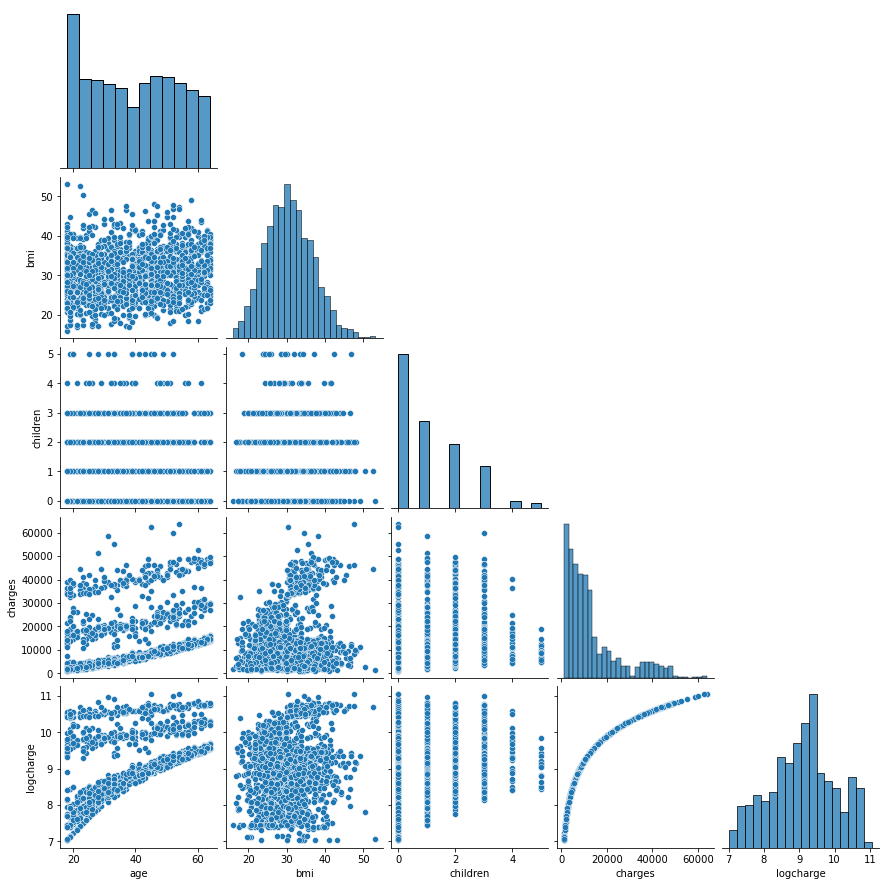

In [12]:
# Inspect pairsplot
sns.pairplot(df, corner=True)

## Question 6:
<div class="alert alert-block alert-info">  
In this question, we're going to start our Bayesian modelling journey by developing a very simple model that uses age to predict charges (on the $\log$ scale). It's up to you to set your own priors, but you should make certain double-check your prior predictive plot, as you'll be graded on the sensibility of your priors. (Not to worry: you'll get full credit as long as your priors aren't completely out to lunch!) Also, be careful to use <code>pm.Deterministic</code> for your linear model: you'll need it later!
</div>
<div class="alert alert-block alert-success">
    Develop Bayesian regression using <code>age_std</code> as the predictor and <code>logcharge_std</code> as the outcome variable. Use <code>pm.Deterministic</code> for your linear model. Assign priors to the model as you see fit, but make sure to check what those priors are predicting using a prior predictive plot. Once you have tuned your priors, submit your prior predictive plot (this happens automatically).
</div>

In [18]:
#_06

# PyMC3 Model:
with pm.Model() as model_06:
    
    # Priors
    α = pm.Normal("α", mu= .1, sigma= .3)
    β = pm.Normal("β", mu= .1, sigma= .3)
    σ = pm.Exponential("σ", lam= 1)
    
    # Linear Model
    μ = pm.Deterministic("μ", α[region_idx] + β[region_idx]*spend_std)
    
    # Likelihood    
    y = pm.Normal("y", mu=μ, sigma=σ, observed=logcharge_std)
    
    # Sample prior predictive
    prior_predictive_06 = pm.sample(
        samples=50,
        var_names=["α", "β"],
        random_seed=42
    )
    
    
# DO NOT CHANGE ANY OF THE CODE BELOW THIS LINE
age_grid = np.linspace(-10, 10, 50)

fig = plt.figure()
plt.xlim((-10, 10))
plt.ylim((-10, 10))

for a, b in zip(prior_predictive_06["α"], prior_predictive_06['β']):
    charge_sim = a + b*age_grid
    plt.plot(age_grid, charge_sim, c='k', alpha=0.4)
    
plt.axhspan(-2, 2, facecolor='black', alpha=0.2)
plt.axvspan(-2, 2, facecolor='black', alpha=0.2)

# Store the result in the assignment variable
_06 = fig # do not change this variable name

IndexError: too many indices for array

## Question 7:
<div class="alert alert-block alert-info">  
Now that you've got a tuned set of priors, your model is ready to go! Time to sample it and produce some inferences!
</div>
<div class="alert alert-block alert-success">
Sample your model using PyMC3's default sampler. Inspect the trace plot for any issues. Produce an HDI plot of the results, using an HDI probability of 0.94. Submit the lower and upper limits of the HDI region (using a tuple, with the lower value first) for each estimated parameter, rounded to 2 decimal places.
</div>

In [ ]:
#_07

with model_06:
    trace_06 = pm._____(random_seed=42)
    
    az.plot_trace(trace_06, ['α', 'β', 'σ'])
    
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 9))
    az._____(
        trace_06,
        ax=axs,
        var_names=['α', 'β', 'σ'],
        round_to=2,
    )
    fig.tight_layout()
    
# Submit answers here:
α_hdi = (_____, _____)
β_hdi = (_____, _____)
σ_hdi = (_____, _____)

# Store the result in the assignment variable
_07 = (
    α_hdi, 
    β_hdi, 
    σ_hdi
) # do not change this variable name

## Question 8:
<div class="alert alert-block alert-info">  
Even though we could get away with using one of the nicer-looking posterior predictive techniques on this model, we're going to want to make sure that everything we use is comparable to the plots from every other model. As such, we're going to ask you to skip ahead and produce a version of the posterior predictive plots in the chapter on Hierarchical regression. They'll be more useful that way!
</div>
<div class="alert alert-block alert-success">
Create a posterior predictive plot. Using between 2 and 4 sentences, interpret what the posterior predictive tells you about your model's ability to retrodict the observed data. Be specific and make references to course material from the readings for this module. Vague answers will not recieve full credit. 
</div>

In [ ]:
#_08

with model_06:
    ppc_06 = pm._____(
        trace_06,
        var_names=['y', 'μ']
    )

plot_ppd(ppc_06, logcharge_std)

# Store the result in the assignment variable
_08 = """

SETENCE ONE OF YOUR INTERPRETATION GOES HERE.
SETENCE TWO OF YOUR INTERPRETATION GOES HERE.
SETENCE THREE OF YOUR INTERPRETATION GOES HERE (if necessary).
SETENCE FOUR OF YOUR INTERPRETATION GOES HERE (if necessary).

""" # do not change this variable name

# <font color="#49699E">PART C | CHAPTER 31</font>
<a id="SECCEP"></a>

## Question 9:
<div class="alert alert-block alert-info">  
    In the chapter on Bayesian Hierarchical Regression, we created a multilevel model <i>before</i> adding other variables to improve fit. We're going to do things the other way around this time; we'll start by adding more variables -- we'll get into the hierarchical content a little later on. 
</div>
<div class="alert alert-block alert-success">
Create a new model that includes <code>age</code>, <code>sex</code>, <code>bmi</code>, and <code>smoker</code> as predictor variables. The <code>logcharge</code> variable should still be your outcome variable. Once you've sampled the model and confirmed that the trace plots don't expose any glaring issues, submit the mean value of the <code>α</code> parameter (alpha, in case it's difficult to see here), rounded to 2 decimal places. 
</div>

In [ ]:
#_09

with pm.Model() as model_09:
    
    # Priors
    α = pm._____("α", mu= _____, sigma= _____)
    β_age = pm._____("β_age", mu= _____, sigma= _____)
    β_sex = pm._____("β_sex", mu= _____, sigma= _____)
    β_bmi = pm._____("β_bmi", mu= _____, sigma= _____)
    β_smoke=pm._____("β_smoke", mu= _____, sigma= _____)
    σ = pm._____("σ", lam= _____)
    
    # Linear Model
    μ = pm.Deterministic(
        "μ", 
        _____ + 
        _____ * _____ +
        _____ * _____ +
        _____ * _____ +
        _____ * _____ 
    )
    
    # Likelihood    
    y = pm._____("y", mu=_____, sigma=_____, _____=logcharge_std)
    
    # Sample
    trace_09 = pm._____(random_seed=42)
    
    varlist =  [
            'α', 
            "β_age",
            "β_sex",
            "β_bmi",
            "β_smoke" ,
            'σ'
        ]
    
    # Plot Trace
    az.plot_trace(
        trace_09,
        varlist
    )
    
    # Plot Posterior
    fig, axs = plt.subplots(6, 1, sharex=True, sharey=True, figsize=(9, 18))
    az.plot_posterior(
        trace_09,
        ax=axs,
        var_names=varlist,
        round_to=2,
    )
    fig.tight_layout()
    
_09_α_mean = _____

# Store the result in the assignment variable
_09 = round(_09_α_mean, 2) # do not change this variable name

## Question 10:

<div class="alert alert-block alert-success">
Produce and examine the posterior predictive plot for the model you created and sampled in question 9. Using 2 to 5 sentences, describe the major differences (if any) between this posterior predictive plot and the one you produced in question 8. If the two are significantly different, why do you think that might be the case? If there is still obvious room for improvement, how could these improvements be implemented? Throughout, be specific and make references to course material from the readings for this module. Vague answers will not recieve full credit. 
</div>

In [ ]:
#_10

with model_09:
    ppc_09 = pm._____(
        trace_09,
        var_names=['y', 'μ']
    )

plot_ppd(ppc_09, logcharge_std)


# Store the result in the assignment variable
_10 = """

SETENCE ONE OF YOUR INTERPRETATION GOES HERE.
SETENCE TWO OF YOUR INTERPRETATION GOES HERE.
SETENCE THREE OF YOUR INTERPRETATION GOES HERE (if necessary).
SETENCE FOUR OF YOUR INTERPRETATION GOES HERE (if necessary).
SETENCE FIVE OF YOUR INTERPRETATION GOES HERE (if necessary).

""" # do not change this variable name

## Question 11:

<div class="alert alert-block alert-info">  
This is the last time we're going to ask you to fit a model for this assignment; you have my word! In this question, we're going to ask you to take your question 9 model a bit further by turning it into a hierarchical model, using <code>region</code> as the clustering variable. In the textbook, we accounted for the influence of the group-level variables on both the intercept (α) and one of the coefficients (β_spend). For this question, you're only going to have to split your model's intercept <code>α</code> into 4, using the technique we showed you in the textbook. <br><br>
    Once that's accomplished, you'll likely notice that your model is ill-behaved. You'll probably get many, many divergences. Spend some time tweaking your priors (and potentially replacing your Exponential distributions with Gamma distributions) until your divergences are down to a reasonable level; say, fewer than 10. We've tweaked some of the other settings for you which will help settle your model down (at the expense of it taking a bit longer to sample). Normally, even a single divergence would call a model's validity into question, but we'll let it slide this time. Once you've gotten a well-behaved model, be sure to examine the trace plots to confirm that everything is okay, and then feel free to move onto question 12! 
</div>
<div class="alert alert-block alert-success">
Convert the model you created for question 9 into a partially-pooled hierarchical model. If your model produces divergences while sampling, alter your priors and hyperpriors until your model produces 10 divergences or fewer. Results from your final trace (the one you ultimately decide to stick with) will be submitted automatically. In order to ensure that your final model is the one that gets submitted when you pickle your assignment <b>be certain to restart the kernal and re-run your entire notebook once through immediately before submitting!</b>
</div>

In [ ]:
#_11


with pm.Model() as model_011:
    
    # Hyperpriors
    α_μ = pm._____("α_μ", mu = _____, sigma = _____)
    α_σ = pm._____("α_σ", lam= _____)
    
    # Priors
    α = pm._____("α", mu= _____, sigma= _____, shape=_____)
    β_age = pm._____("β_age", mu= _____, sigma= _____)
    β_sex = pm._____("β_sex", mu= _____, sigma= _____)
    β_bmi = pm._____("β_bmi", mu= _____, sigma= _____)
    β_smoke=pm._____("β_smoke", mu= _____, sigma= _____)
    σ = pm._____("σ", lam= _____)
    
    # Linear Model
    μ = pm.Deterministic(
        "μ", 
        _____[_____] + 
        _____ * _____ +
        _____ * _____ +
        _____ * _____ +
        _____ * _____
    )
    
    # Likelihood    
    y = pm._____("y", mu=_____, sigma=_____, _____=logcharge_std)
    
    # Sample
    trace_011 = pm._____(
        target_accept=0.98,
        random_seed=42
    )
    
    varlist =  [
            'α', 
            "β_age",
            "β_sex",
            "β_bmi",
            "β_smoke" ,
            'σ'
        ]
    
    # Plot Trace
    az.plot_trace(
        trace_011,
        varlist
    )

# DO NOT CHANGE ANYTHING BELOW THIS LINE
    
# Store the result in the assignment variable
_11 = (trace_011["diverging"].nonzero()[0].size,
       trace_011.varnames,
       trace_011.get_values("α").shape)    

## Question 12:

<div class="alert alert-block alert-info">  
Time to interpret your final multilevel model! Your task here will be to examine your model's posterior distribution and posterior predictive plots. Once you've had a good look at them, tell us what you see!  
</div>
<div class="alert alert-block alert-success">
Produce and examine a posterior HDI plot and a posterior predictive plot. Using 2 to 5 sentences, assess the impact (if any) of the multilevel component of the model you built for question 11. What influence did it have on the model's ability to retrodict the data, compared to the question 9 model? In one sentence, what might be a reasonable conclusion to draw about the differences between the four different regions in the dataset?  Throughout, be specific and make references to course material from the readings for this module. Vague answers will not recieve full credit. 
</div>

In [ ]:
#_12

with model_011:
    # Plot Posterior
    fig, axs = plt.subplots(9, 1, sharex=True, sharey=True, figsize=(9, 27))
    az.plot_posterior(
        trace_011,
        ax=axs,
        var_names=varlist,
        round_to=2,
    )
    fig.tight_layout()
    


    ppc_011 = pm._____(
        trace_011,
        var_names=['y', 'μ']
    )

plot_ppd(ppc_011, logcharge_std)

# Store the result in the assignment variable
_12 = """

SETENCE ONE OF YOUR INTERPRETATION GOES HERE.
SETENCE TWO OF YOUR INTERPRETATION GOES HERE.
SETENCE THREE OF YOUR INTERPRETATION GOES HERE (if necessary).
SETENCE FOUR OF YOUR INTERPRETATION GOES HERE (if necessary).
SETENCE FIVE OF YOUR INTERPRETATION GOES HERE (if necessary).

""" # do not change this variable name

In [ ]:
## FINALIZE ASSIGNMENT

import pickle as pkl

module = 9

response_dict = {
    "student_id": student_id,
    "grad_student": "Undergraduate",
    "module": module,
    "responses": [
        _01,
        _02,
        _03,
        _04,
        _05,
        _06,
        _07,
        _08,
        _09,
        _10,
        _11,
        _12,
    ],
    "code_cells": In
}

module_string = f"module_{response_dict['module']}"
filename = f"{module_string}__student_{student_id}.pkl"

with open(f"./{filename}", 'wb') as stream:
    pkl.dump(response_dict, stream)